In [2]:
try:
    import requests
except:
    !pip3 install requests
    import requests
try:
    import pydependencygrapher
except:
    !apt-get install libcairo2-dev libjpeg-dev libgif-dev
    !pip3 install pydependencygrapher
    import pydependencygrapher
import base64
import IPython

# Using LX-DepParser to parse sentences and displaying dependency tree graphs
This is an minimalist example notebook that illustrates how you can use the LX-DepParser web service to parse 
sentences and how to visualize dependency tree graphs in a notebook.

**Before you run this example**, replace `access_key_goes_here` by your webservice access key, below:

#id	form	lemma	cpos	pos	feat	head	deprel	phead	pdeprel
1	A	-	DA	DA	fs	2	SP	2	SP
2	Maria	-	PNM	PNM	-	3	SJ	3	SJ
3	tem	TER	V	V	pi-3s	0	ROOT	0	ROOT
4	razão	RAZÃO	CN	CN	gs	3	DO	3	DO
5	.	-	PNT	PNT	-	3	PUNCT	3	PUNCT




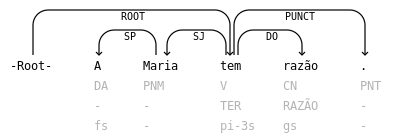

In [3]:
request = requests.post(
    url='https://portulanclarin.net/workbench/lx-depparser/api/',
    json={
        'method': 'parse',
        'jsonrpc': '2.0',
        'id': 0,
        'params': {
            'text': 'A Maria tem razão.',
            'format': 'CONLL',
            'tagset': 'CINTIL',
            'key': 'access_key_goes_here'
        },
    },
)
conll = request.json()['result']
print(conll)
sentence = [
    pydependencygrapher.Token(*line.split("\t"))
    for line in conll.splitlines(keepends=False)
    if line and not line.startswith("#")
]
graph = pydependencygrapher.DependencyGraph(sentence)
graph.draw()
b64png = graph.save_buffer()
IPython.display.display(IPython.display.Image(data=base64.b64decode(b64png)))
